# Trabajo Práctico 3 - Aritmética de Píxeles

La actividad propuesta debe permitir seleccionar dos imágenes y con estas poder acceder a un menú que permita realizar las siguientes operaciones entre estas:

En espacio RGB:
* Sumas y restas: clampeada y promediada

Es espacio YIQ:
* Sumas y Restas: clampeada, promediada, if-ligther, if-darker

El resultado de estas se debe guardar como una nueva imagen. Se deben mostrar los resultados de todas las operaciones mencionadas. 

Nota: leer cuidadosamente en la teoría las pautas que debe tener cada una de estas operaciones. Las operaciones deben ser realizadas como funciones desarrolladas por ustedes NO mediante funciones de librerías que ya las realicen.

## 1. Importar Librerías Necesarias para Lectura de Imagen y Graficado

In [26]:
import os
import numpy as np
import imageio as io
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from skimage.transform import resize

## 2. Funciones de procesamiento

In [66]:
# Descargar, leer, normalizar la imagen.
def get_and_read_img (url, name=''):
  img = io.imread(url)
  img = img/255.
  img = resize(img,(600,600))
  return img

# Mostrar Imagen
def show_img (img, size = (8,8)):
  plt.figure(figsize = size)
  plt.imshow(img)
  plt.show()

# RGB a YIQ
def rgb2yiq (img):
  RGB_2_YIQ_MATRIX = np.array([[ 0.299, 0.587, 0.114], 
                               [ 0.595716, -0.274453, -0.321263], 
                               [ 0.211456, -0.522591, 0.311135]])
  
  im_yiq =  np.copy(img)
  for i in range(len(img)):
    for j in range(len(img[0])):
        im_yiq[i][j] = RGB_2_YIQ_MATRIX.dot(img[i][j])

  im_yiq[:,:,0] = np.clip(im_yiq[:,:,0],0,1)
  im_yiq[:,:,1] = np.clip(im_yiq[:,:,1],-0.5957, 0.5957)
  im_yiq[:,:,2] = np.clip(im_yiq[:,:,2],-0.5226, 0.5226)

  return im_yiq

# YIQ a RGB
def yiq2rgb (img):
  YIQ_2_RGB_MATRIX = np.array([[1, 0.9663, 0.6210], 
                              [1, -0.2721, -0.6474], 
                              [1, -1.1070, 1.7046]])
  im_rgb =  np.copy(img)
  for i in range(len(img)):
    for j in range(len(img[0])):
        im_rgb[i][j] = np.clip(YIQ_2_RGB_MATRIX.dot(img[i][j]),0,1)

  return im_rgb

def suma_clamp_rgb (image1, image2):
  image3 = image1 + image2
  image3 = np.clip(image3, 0, 1)
  return image3

def resta_clamp_rgb (image1, image2):
  image3 = image1 - image2
  image3 = np.clip(image3, 0, 1)
  return image3

def suma_avg_rgb (image1, image2):
  image3 = (image1 + image2)/2.
  image3 = np.clip(image3, 0., 1.)
  return image3

def resta_avg_rgb (image1, image2):
  image3 = (image1 - image2)/2.
  image3 = np.clip(image3, 0., 1.)
  return image3

def suma_clamp_yiq (image1, image2):
  image1_yiq = rgb2yiq(image1)
  image2_yiq = rgb2yiq(image2)

  Y1, I1, Q1 = image1_yiq[:,:,0], image1_yiq[:,:,1], image1_yiq[:,:,2]
  Y2, I2, Q2 = image2_yiq[:,:,0], image2_yiq[:,:,1], image2_yiq[:,:,2]

  Y_new = Y1 + Y2
  Y_new = np.clip(Y_new, 0., 1.)
  I_new = (Y1*I1 + Y2*I2)/(Y1+Y2)
  I_new = np.clip(I_new, -0.5957, 0.5957)
  Q_new = (Y1*Q1 + Y2*Q2)/(Y1+Y2) 
  Q_new = np.clip(Q_new, -0.5226, 0.5226)

  yiq_clampped = np.dstack((Y_new, I_new, Q_new))
  return yiq_clampped

def resta_clamp_yiq (image1, image2):
  image1_yiq = rgb2yiq(image1)
  image2_yiq = rgb2yiq(image2)

  Y1, I1, Q1 = image1_yiq[:,:,0], image1_yiq[:,:,1], image1_yiq[:,:,2]
  Y2, I2, Q2 = image2_yiq[:,:,0], image2_yiq[:,:,1], image2_yiq[:,:,2]

  Y_new = Y1 - Y2
  Y_new = np.clip(Y_new, 0., 1.)
  I_new = (Y1*I1 - Y2*I2)/(Y1+Y2)
  I_new = np.clip(I_new, -0.5957, 0.5957)
  Q_new = (Y1*Q1 - Y2*Q2)/(Y1+Y2) 
  Q_new = np.clip(Q_new, -0.5226, 0.5226)

  yiq_clampped = np.dstack((Y_new, I_new, Q_new))
  return yiq_clampped

def suma_avg_yiq (image1, image2):
  image1_yiq = rgb2yiq(image1)
  image2_yiq = rgb2yiq(image2)

  Y1, I1, Q1 = image1_yiq[:,:,0], image1_yiq[:,:,1], image1_yiq[:,:,2]
  Y2, I2, Q2 = image2_yiq[:,:,0], image2_yiq[:,:,1], image2_yiq[:,:,2]

  Y_new = (Y1 + Y2)/2.
  Y_new = np.clip(Y_new, 0., 1.)
  I_new = (Y1*I1 + Y2*I2)/(Y1+Y2)
  I_new = np.clip(I_new, -0.5957, 0.5957)
  Q_new = (Y1*Q1 + Y2*Q2)/(Y1+Y2) 
  Q_new = np.clip(Q_new, -0.5226, 0.5226)
  yiq_clamp = np.dstack((Y_new, I_new, Q_new))
  return yiq_clamp

def resta_avg_yiq (image1, image2):
  image1_yiq = rgb2yiq(image1)
  image2_yiq = rgb2yiq(image2)

  Y1, I1, Q1 = image1_yiq[:,:,0], image1_yiq[:,:,1], image1_yiq[:,:,2]
  Y2, I2, Q2 = image2_yiq[:,:,0], image2_yiq[:,:,1], image2_yiq[:,:,2]

  Y_new = (Y1 - Y2)/2.
  Y_new = np.clip(Y_new, 0., 1.)
  I_new = (Y1*I1 - Y2*I2)/(Y1+Y2)
  I_new = np.clip(I_new, -0.5957, 0.5957)
  Q_new = (Y1*Q1 - Y2*Q2)/(Y1+Y2) 
  Q_new = np.clip(Q_new, -0.5226, 0.5226)

  yiq_clampped = np.dstack((Y_new, I_new, Q_new))
  return yiq_clampped

def yiq_if_ligther (image1, image2):

  YIQ1 = rgb2yiq(image1)
  YIQ2 = rgb2yiq(image2)

  Y1, I1, Q1 = YIQ1[:,:,0], YIQ1[:,:,1], YIQ1[:,:,2]
  Y2, I2, Q2 = YIQ2[:,:,0], YIQ2[:,:,1], YIQ2[:,:,2]

  Y_new = np.zeros_like(Y1)
  I_new = np.zeros_like(I1)
  Q_new = np.zeros_like(Q1)

  for i in range(len(Y1)):
    for j in range(len(Y1[0])):
      if Y1[i,j] >= Y2[i,j]:
        Y_new[i,j] = Y1[i,j]
        I_new[i,j] = I1[i,j]
        Q_new[i,j]= Q1[i,j]
      else:
        Y_new[i,j] = Y2[i,j]
        I_new[i,j] = I2[i,j]
        Q_new[i,j] = Q2[i,j]

  
  Y_new = np.clip(Y_new, 0., 1.)
  I_new = np.clip(I_new, -0.5957, 0.5957)
  Q_new = np.clip(Q_new, -0.5226, 0.5226)
  yiq_lighter = np.dstack((Y_new, I_new, Q_new))

  return yiq_lighter

def yiq_if_darker (image1, image2):

  YIQ1 = rgb2yiq(image1)
  YIQ2 = rgb2yiq(image2)

  Y1, I1, Q1 = YIQ1[:,:,0], YIQ1[:,:,1], YIQ1[:,:,2]
  Y2, I2, Q2 = YIQ2[:,:,0], YIQ2[:,:,1], YIQ2[:,:,2]

  Y_new = np.zeros_like(Y1)
  I_new = np.zeros_like(I1)
  Q_new = np.zeros_like(Q1)

  for i in range(len(Y1)):
    for j in range(len(Y1[0])):
      if Y1[i,j] <= Y2[i,j]:
        Y_new[i,j] = Y1[i,j]
        I_new[i,j] = I1[i,j]
        Q_new[i,j]= Q1[i,j]
      else:
        Y_new[i,j] = Y2[i,j]
        I_new[i,j] = I2[i,j]
        Q_new[i,j] = Q2[i,j]
  
  Y_new = np.clip(Y_new, 0., 1.)
  I_new = np.clip(I_new, -0.5957, 0.5957)
  Q_new = np.clip(Q_new, -0.5226, 0.5226)
  yiq_darker = np.dstack((Y_new, I_new, Q_new))

  return yiq_darker

# 3. Procesamiento de Imágenes de Entrada

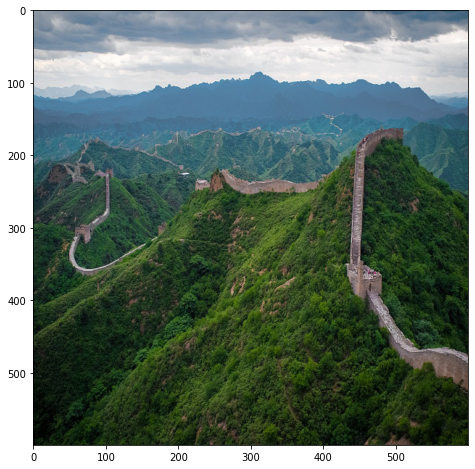

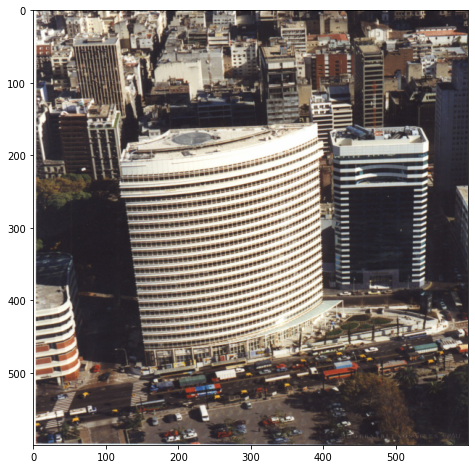

In [67]:
#@title Imágenes de Entrada: { run: "auto" }
dict_urls = {'Auto':'https://www.cronista.com/files/image/291/291678/5ffe04364a8d4.jpg',
             'Edificio':'https://s3-sa-east-1.amazonaws.com/modernabuenosaires/img/obras/galeria/888_1506021627.jpg',
             'Muralla':'https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/The_Great_Wall_of_China_at_Jinshanling-edit.jpg/1200px-The_Great_Wall_of_China_at_Jinshanling-edit.jpg',
             'Eiffel':'https://www.toureiffel.paris/sites/default/files/actualite/image_principale/vue_depuisjardins_webbanner.jpg'
            }

Imagen1 = 'Muralla' #@param ["Auto","Edificio","Muralla","Eiffel"]
Imagen2 = 'Edificio' #@param ["Auto","Edificio","Muralla","Eiffel"]

image1 = get_and_read_img(dict_urls[Imagen1])
image2 = get_and_read_img(dict_urls[Imagen2])

show_img(image1)
show_img(image2)

# 4. Selección de operaciones a realizar

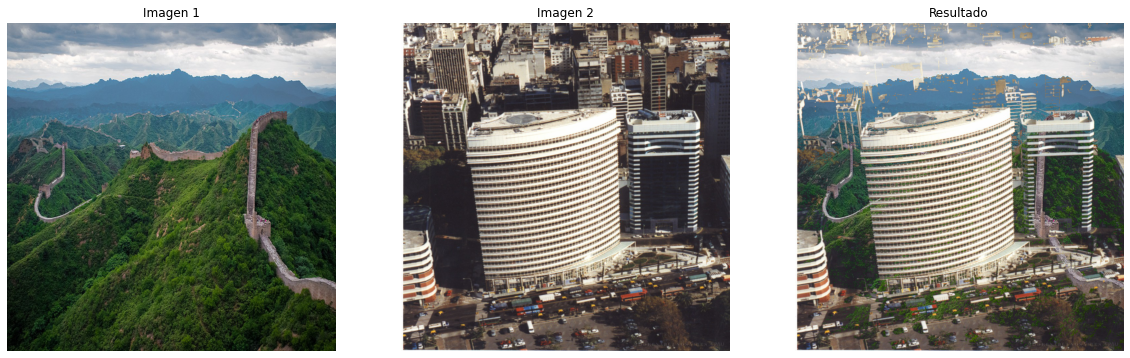

In [68]:
#@title Aritmética de Píxel { run: "auto" }
#@markdown Espacio cromático de entrada:
Espacio = 'yiq' #@param ["rgb","yiq"]
Operación = 'if_ligther' #@param ["suma","resta", "if_ligther", "if_darker"]
Cierre = 'clamp' #@param ["clamp", "avg"]

if ('if_' not in Operación):
  image_proc = eval( Operación + '_' + Cierre + '_' + Espacio)(image1,image2)
else:
  image_proc = eval( Espacio + '_' + Operación )(image1,image2)

if (Espacio == 'yiq'):
  image_proc = yiq2rgb(image_proc)

plt.subplots(1,3,figsize=(20,20))

plt.subplot(1,3,1)
plt.imshow(image1)
plt.title ("Imagen 1")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(image2)
plt.title ("Imagen 2")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(image_proc)
plt.title ("Resultado")
plt.axis('off')

image_proc = (image_proc*255).astype('uint8')    
io.imwrite(Imagen1 + Imagen2 + Operación + '_' + Cierre + '_' + Espacio + ".jpg",image_proc)


# 5. Barrido de Operaciones

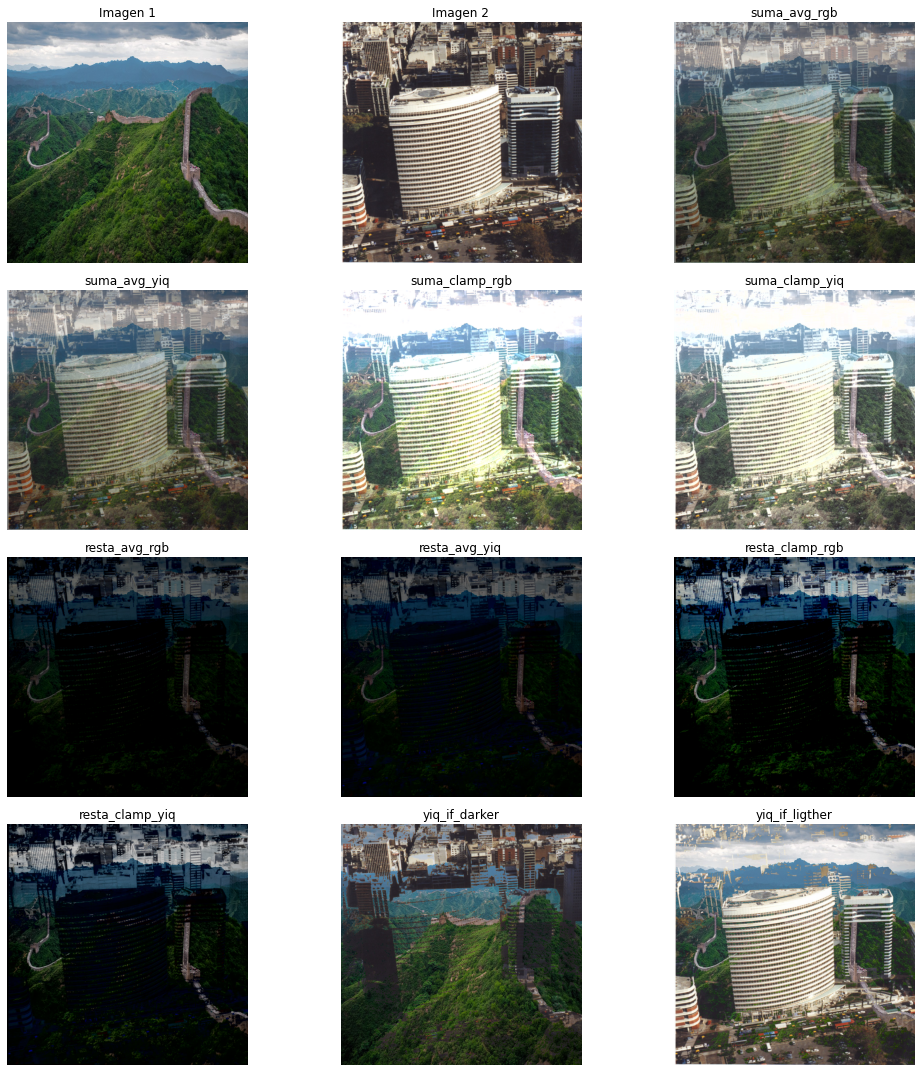

In [69]:
plt.subplots(4,3,figsize=(15,15))

operations = ['suma_avg_rgb','suma_avg_yiq','suma_clamp_rgb','suma_clamp_yiq','resta_avg_rgb','resta_avg_yiq','resta_clamp_rgb','resta_clamp_yiq','yiq_if_darker','yiq_if_ligther']

plt.subplot(4,3,1)
plt.imshow(image1)
plt.title ("Imagen 1")
plt.axis('off')

plt.subplot(4,3,2)
plt.imshow(image2)
plt.title ("Imagen 2")
plt.axis('off')

for i in range(len(operations)):
  plt.subplot(4,3,i+3)
  image_proc = eval(operations[i])(image1, image2)
  if ('yiq' in operations[i]):
    image_proc = yiq2rgb(image_proc)
  image_proc = (image_proc*255).astype('uint8')    
  plt.imshow(image_proc)
  plt.title (operations[i])
  plt.axis('off')

plt.tight_layout()
plt.show()

# 6. Conclusión

* En la suma clampeada en el espacio RGB vemos muchos píxeles que saturan hacia arriba (la intensidad de píxel es 255) lo que producen pérdida de información en esos píxeles, ya que no podemos representar esa suma realmente y se nota en la imagen regiones en blanco. 

* Si de lo anterior cambiamos a sumas promediadas en el espacio RGB, vemos que la saturación de los píxeles es menos frecuente y se produce una fusión de las imágenes más suave.

* En el espacio cromático YIQ es menos frecuente la saturación de la intensidad de píxeles a 255 debido a que se desacopla la luminancia con la cromaticidad.

* En el caso de la resta, el clampeo muestra un mejor resultado ya que es una función no decreciente, por lo que habrá menos valores saturados hacia abajo (en 0).

* if-ligther parece ser el procesamiento que mejor resultado tiene, quedándose con las regiones donde la luminancia es mayor respecto a la otra imagen.

* En el caso de if-darker obtenemos el efecto contrario a if-lighter.